In [1]:
import pandas as pd
import matplotlib.pyplot as plt


# Data Story

In [2]:
dataset = pd.read_csv("../data/train/train_feature.csv", index_col='id')
dataset.head()

,num_orders,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
id,,,,,,,,,,,,,,
1379560,177,1,55,1885,136.83,152.29,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1466964,270,1,55,1993,136.83,135.83,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1346989,189,1,55,2539,134.86,135.86,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1338232,54,1,55,2139,339.50,437.53,0,0,647,56,TYPE_C,2.0,Beverages,Indian
1448490,40,1,55,2631,243.50,242.50,0,0,647,56,TYPE_C,2.0,Beverages,Indian


In [3]:
categorical_columns = ['week', 'center_id', 'meal_id', 'emailer_for_promotion', 'homepage_featured', 'city_code', 
                       'region_code', 'center_type', 'category', 'cuisine']
for column in categorical_columns:
    dataset[column] = dataset[column].astype('category')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 1379560 to 1361984
Data columns (total 14 columns):
num_orders               456548 non-null int64
week                     456548 non-null category
center_id                456548 non-null category
meal_id                  456548 non-null category
checkout_price           456548 non-null float64
base_price               456548 non-null float64
emailer_for_promotion    456548 non-null category
homepage_featured        456548 non-null category
city_code                456548 non-null category
region_code              456548 non-null category
center_type              456548 non-null category
op_area                  456548 non-null float64
category                 456548 non-null category
cuisine                  456548 non-null category
dtypes: category(10), float64(3), int64(1)
memory usage: 22.2 MB


### What is the total trend of orders ?

In [4]:
overall_orders_trend = dataset[['week', 'num_orders']].groupby('week').sum()
overall_orders_trend.head()

,num_orders
week,
1,792261
2,787084
3,695262
4,743529
5,1198675


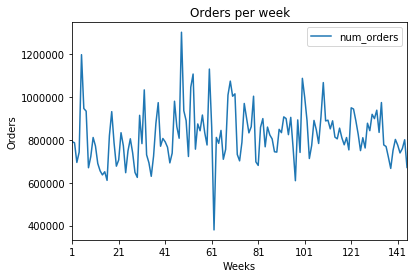

In [5]:
overall_orders_trend.reset_index().plot('week', 'num_orders')
_ = plt.title("Orders per week")
_ = plt.xlabel("Weeks")
_ = plt.ylabel("Orders")
plt.show()

There were maximum orders in week 48 and 5 and minimum orders in week 62. These raises below questions:
1. What went good in week 48 and 5 ?
2. What went wrong in week 62 ?

#### Compare week 62 and week 48

In [6]:
dataset_week_62 = dataset[dataset.week == 62]
dataset_week_62.head()

,num_orders,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
id,,,,,,,,,,,,,,
1060959,108,62,55,1885,143.59,143.59,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1016680,53,62,55,1993,142.59,143.59,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1178978,94,62,55,2539,147.50,145.50,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1184367,14,62,55,2139,275.48,276.48,0,0,647,56,TYPE_C,2.0,Beverages,Indian
1370000,54,62,55,2631,153.26,154.26,0,0,647,56,TYPE_C,2.0,Beverages,Indian


In [7]:
dataset_week_48 = dataset[dataset.week == 48]
dataset_week_48.head()

,num_orders,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
id,,,,,,,,,,,,,,
1078055,366,48,55,1885,122.25,145.53,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1343992,284,48,55,1993,121.28,145.56,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1243384,161,48,55,2539,119.31,144.53,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1330205,26,48,55,2139,298.82,298.82,0,0,647,56,TYPE_C,2.0,Beverages,Indian
1072054,80,48,55,2631,150.35,150.35,0,0,647,56,TYPE_C,2.0,Beverages,Indian


Let's compare the distribution of num_orders

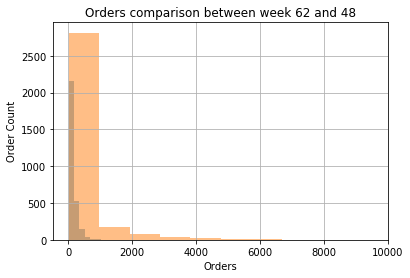

In [8]:
dataset_week_62.num_orders.hist(alpha=0.5)
dataset_week_48.num_orders.hist(alpha=0.5)

_ = plt.xlabel('Orders')
_ = plt.ylabel('Order Count')
_ = plt.title('Orders comparison between week 62 and 48')

<p>There is a hugh difference between the distribution.</p>

In [9]:
dataset_week_62.emailer_for_promotion.value_counts()

0    2715
1     175
Name: emailer_for_promotion, dtype: int64

In [10]:
dataset_week_48.emailer_for_promotion.value_counts()

0    2729
1     401
Name: emailer_for_promotion, dtype: int64

There were almost double promotional activity, by email, in week 48 as compare to week 62. Hence, there is hugh difference in number of orders.